## Name : Ayush Panchal
## Roll  Number : P24DS013

## PRACTICAL EXAM

# 1. IMPORTING NECESSARY LIBRARIES

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [4]:
data = pd.read_csv("iris_dataset.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. STANDARD SCALAR ON DATA

In [8]:
scalar = StandardScaler()
X = data.drop(["class"], axis = 1)
y = data[["class"]]

X, y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
               class
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virginica
 149  Iris-virginica
 
 [150 rows 

In [9]:
X_scaled = scalar.fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [10]:
data_encoded = pd.get_dummies(data)
data_encoded.shape

(150, 7)

In [11]:
data_encoded.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica'],
      dtype='object')

# 3. ONE HOT ENCODING THE CATEGORICAL FEATURES

In [12]:
Y_encoded = pd.get_dummies(y)
Y_encoded

,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [13]:
import warnings
warnings.filterwarnings("ignore")

# 4. EDA ON FEATURES

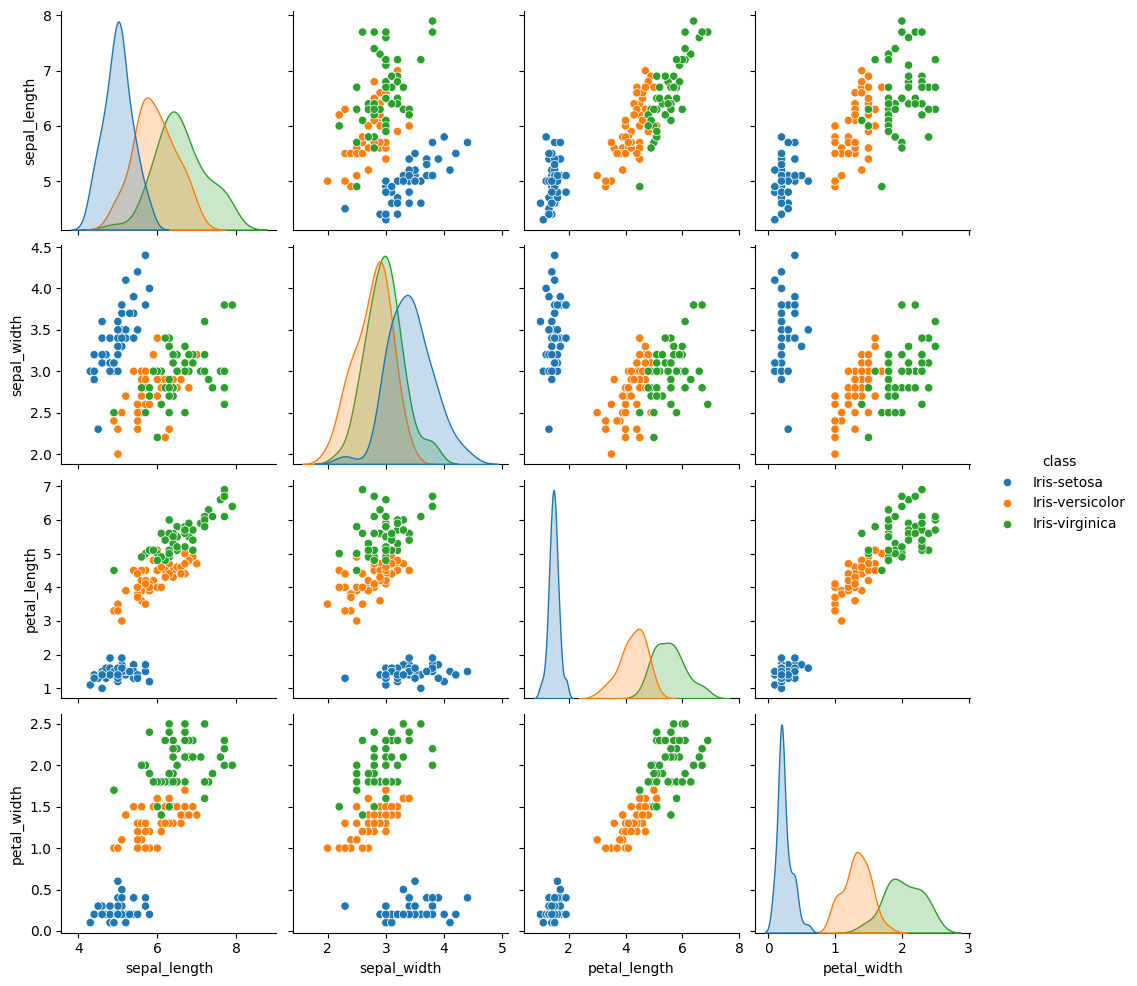

In [14]:
import seaborn as sns

_ = sns.pairplot(data, hue="class")

# 5. EDA + PCA

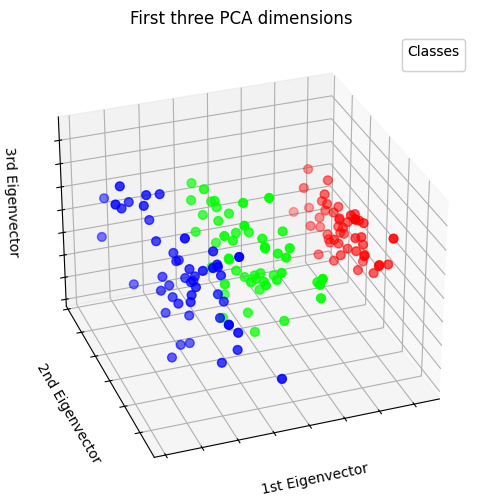

In [15]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(data_encoded[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=Y_encoded,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    Y_encoded,
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

## CORRELATION MATRIX

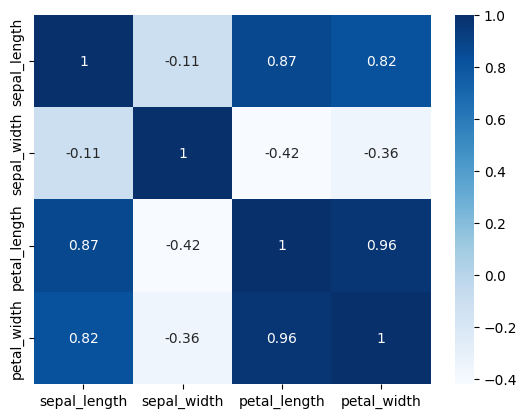

In [21]:
numeric_data = data_encoded.select_dtypes(include=[float, int])

numeric_data = data.drop(columns=['class'],)
sns.heatmap(numeric_data.corr(), annot=True, cmap='Blues')
plt.show()

# 6. TRAIN AND TEST SPLIT

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y ,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 3), (30, 3), (120, 1), (30, 1))

# 7. SVM CLASSIFICATION WITHOUT HYPERPARAM TUNING BUT WITH PCA

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("SVC Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

SVC Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [19]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

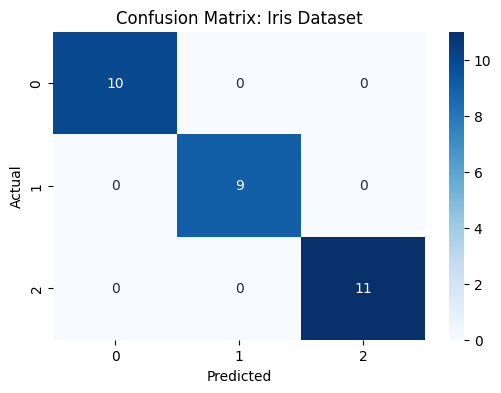

In [20]:
plot_confusion_matrix(conf_matrix, 'Iris Dataset')

# 8. RANDOM SEARCH CV ALGORITHM WITH 5 FOLDS

In [22]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [24]:
randomized_search = RandomizedSearchCV(svc, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   scoring='accuracy')

In [25]:
randomized_search.best_params_

{'kernel': 'poly', 'gamma': 0.1, 'C': 100}

In [26]:
randomized_search.best_score_

0.9583333333333334

In [27]:
randomized_search.best_estimator_

SVC(C=100, gamma=0.1, kernel='poly')

# 9. RESULTS FROM BEST ESTIMATOR OF RANDOM SEARCH CV ALGORITHM

In [28]:
y_preds = randomized_search.best_estimator_.predict(X_test)

In [29]:
class_report = classification_report(y_test, y_preds)
print(class_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



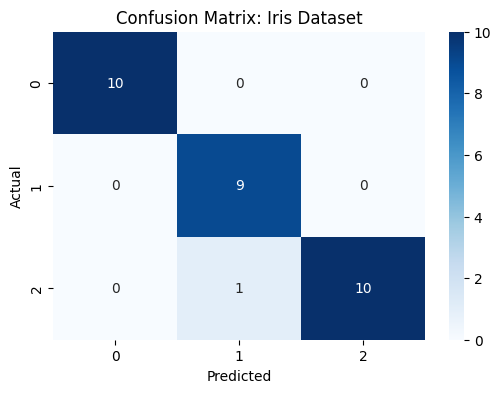

In [30]:
conf_matrix = confusion_matrix(y_test, y_preds)
plot_confusion_matrix(conf_matrix, 'Iris Dataset')

# 10 CONCLUSION : 

1. PCA AND HYPER PARAM TUNING HAS HUGE IMPACT ON MODEL'S PERFORMANCE.
2. CURSE OF DIMENTSIONALITY CAN BE REMOVED USING PCA.
3. AS WE KNOW THAT THE NOT ALL THE DATA POINTS CAN BE LINERALY SEPARABLE, IN SUCH CASES WE NEED NON LINEAR KERNELS ALSO, SUCH AS RBF OR POLY KERNEL.
4. DIFFERENT KERNEL BASED ON RESPECTIVE DATA POINTS CAN GIVE PERFECT DECISION BOUNDRIES SUCH THAT MODEL CAN CLEARLY CLASSIFY THE DATA POINT,